<h2>Opinion Lexicon dataset:</h2>

1. This dataset is compiled by Hu and Liu in 2004 as part of their research on sentiment analysis and opinion mining.

2. The opinion_lexicon dataset is a part of the NLTK corpus, which is a collection of various text resources for natural language processing tasks.

3. This dataset contains two files: 
    a. positive-words.txt
    b. negative-words.txt
   which contain lists of English words with positive and negative sentiments, respectively

4. The words in these lists were manually annotated and can be used as a lexical resource for various NLP tasks involving sentiment analysis, opinion mining, and emotion detection.

5. The positive-words.txt file contains around 2,006 words with positive sentiments, such as "excellent," "amazing," "wonderful," and "delightful."

6. The negative-words.txt file contains approximately 4,783 words with negative sentiments, such as "awful," "terrible," "horrible," and "disgusting."

<h4>Objective:</h4>
To find whether the average length of the positive review words and the length of negative review words are different or not, proove the same with a statistical test if necessary.

In [1]:
import nltk
from nltk.corpus import opinion_lexicon
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\PRASAD\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [2]:
positive_review_words = opinion_lexicon.words('positive-words.txt')
negative_review_words = opinion_lexicon.words('negative-words.txt')

In [3]:
positive_review_words[:10]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [4]:
negative_review_words[:10]

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted']

In [5]:
positive_review_words_lengths = [len(word) for word in positive_review_words]
negative_review_words_lengths = [len(word) for word in negative_review_words]

In [6]:
positive_review_words_lengths[:10]

[2, 6, 7, 9, 8, 10, 10, 7, 9, 11]

In [7]:
negative_review_words_lengths[:10]

[7, 7, 8, 7, 10, 10, 9, 11, 5, 7]

In [8]:
import numpy as np

print(f"Average length of positive review words: {np.mean(positive_review_words_lengths)}")
print(f"Average length of negative review words: {np.mean(negative_review_words_lengths)}")

Average length of positive review words: 8.517946161515454
Average length of negative review words: 8.357934350825841


<Axes: ylabel='Count'>

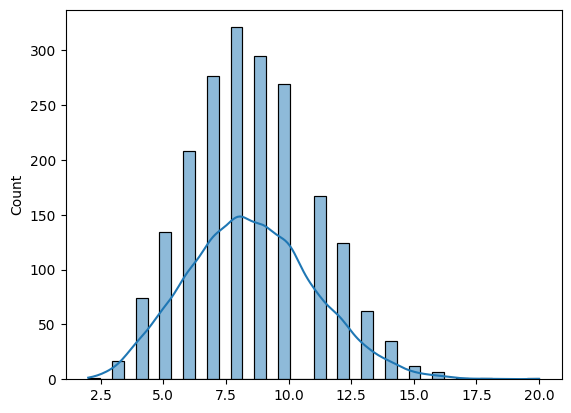

In [9]:
import seaborn as sns

sns.histplot(positive_review_words_lengths,kde=True)

<Axes: ylabel='Count'>

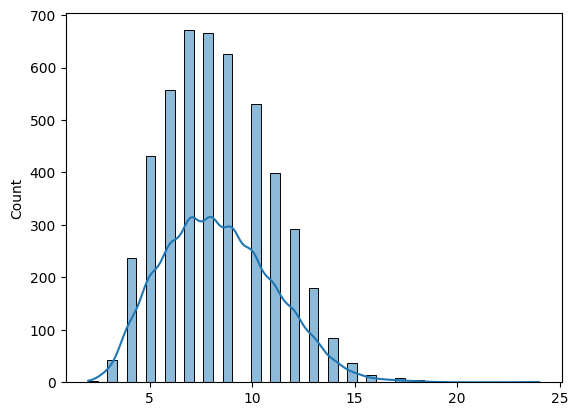

In [10]:
sns.histplot(negative_review_words_lengths,kde=True)

In [11]:
from scipy.stats import shapiro

test_statistic,p_value = shapiro(positive_review_words_lengths)

if p_value <0.05:
    print("The data is not following normal distribution")
else:
    print("The data is following a normal distribution")

The data is not following normal distribution


In [12]:
test_statistic,p_value = shapiro(negative_review_words_lengths)

if p_value <0.05:
    print("The data is not following normal distribution")
else:
    print("The data is following a normal distribution")

The data is not following normal distribution


Hypothesis test:

Null Hypothesis: The positive review words and negative review words lengths are following the same distribution and not significantly different.

In [13]:
from scipy.stats import mannwhitneyu

test_statistic, p_value = mannwhitneyu(positive_review_words_lengths,negative_review_words_lengths,alternative='two-sided')

alpha = 0.05

if p_value<alpha:
    print("Reject Null Hypothesis, Both the distributions are significantly different")
else:
    print("Accept Null Hypothesis, Both the distributions are following the same and there is no significant difference")

Reject Null Hypothesis, Both the distributions are significantly different
